In [1]:
# Python standard library
import sys
import csv
import os

# Scientific computing

import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage
import sklearn.mixture
import seaborn as sns

#plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

# Program specific
PORE_STATS_BASE_DIRECTORY = os.getcwd().replace('notebooks', 'repo')
sys.path.append(PORE_STATS_BASE_DIRECTORY)


import optical_imaging as oi
import oi_file
import image_processing as ip

In [2]:
# Define file path
#data_base_path = oi_file.data_base_path
data_base_path = 'D:/'
date = '10-8-20'
cell = '/hl60'
channel_type = '/25_50_25x150'
file_index = '0'



file_path = data_base_path + date + cell + channel_type + '/oi/'+ file_index+ '/bin/test_camera_0.raw'

#file_path = data_base_path + date + cell + channel_type + '/oi/'+ file_index+ '/bin/frames/frames.txt'


# Set output file path
output_file_path = data_base_path + date + cell + channel_type + '/oi/' + file_index + '/events/test_camera_0' + '_events.json'

# Open video
res_x = 880
res_y = 140
fps = 11100
exp = 1.5
camera = 0

## camera = 0 is raw 16bpp chronos
oi_vid = oi_file.Video(file_path, res_x, res_y, fps, exp,camera=camera)

# Load events
oi_events = oi_file.open_event_file_json(output_file_path)

print 'loaded', len(oi_events), 'oi events'

IOError: [Errno 2] No such file or directory: 'D:/10-8-20/hl60/25_50_25x150/oi/0/events/test_camera_0_events.json'

In [18]:
from skimage import io


In [19]:
mna = []
mxa = []
for i in range(len(oi_events)):
    eventnum = i
    event = oi_events[eventnum]
    num_det = len(event._detections)
    for j in range(num_det):
        det = event._detections[j]
        tf = det._tf
        
        
        img = oi_vid.get_frame(tf)
        mn = img.min()
        mx = img.max()
        
        mna.append(mn)
        mxa.append(mx)

In [20]:
mns = np.min(mna)
mxs = np.max(mxa)

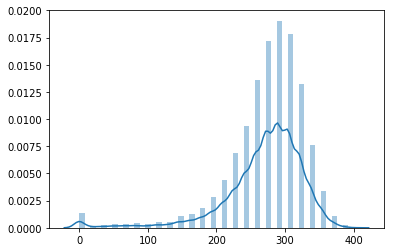

In [27]:
sns.distplot(mna)

In [8]:
images = []
for i in range(len(oi_events)):
    eventnum = i
    event = oi_events[eventnum]
    num_det = len(event._detections)
    for j in range(num_det):
        det = event._detections[j]
        tf = det._tf
        
        
        img = oi_vid.get_frame(tf)
        images.append(img)
        plt.imsave('D:/mrcnn-images/'  + date + '/' + cell + '/' + file_index + '/event_images/' + str(i) + ' ' + str (j)+'.png',img,
                  vmin = mns,vmax = mxs, cmap='gray',origin = 'lower')
images = np.array(images)

# Save background images

In [9]:
oi_events[0].get_tf()

array([128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169])

In [34]:
n = 1000
cell_frames = []
for i in range(len(oi_events)):
    cell_frames.append(oi_events[i].get_tf())
    
full_frames = np.concatenate(cell_frames,axis=0)[:n] 

for i in range(n):
    img = oi_vid.get_frame(i)
    if i not in(full_frames):
        plt.imsave('D:/mrcnn-images/'  + date + '/' + cell + '/' + file_index + '/background/' + str(i) +'.png',img,
                  vmin = mns,vmax = mxs, cmap='gray',origin = 'lower')

In [34]:
if 128 not in(full_frames):
    
    

False

In [29]:
for i in range()
if i in(full_frames):
    print(i)

In [17]:
np.concatenate(cell_frames,axis=0)

array([  128,   129,   130, ..., 91856, 91857, 91858])

In [12]:
images_reshape = images.reshape(images.shape[0],-1)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
test = scaler.fit_transform(images_reshape)


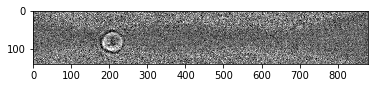

In [16]:
plt.imshow(test[10].reshape((140,880)),cmap='gray')

In [18]:
test_reshape = (np.mean(test,axis=0)).reshape((140,880))

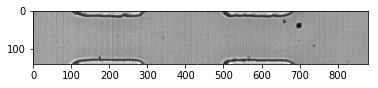

In [22]:
mean_image = images.mean(axis=0)
plt.imshow(mean_image,cmap='gray')

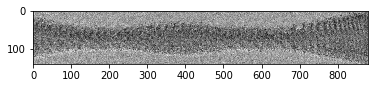

In [21]:

plt.imshow(test_reshape,cmap='gray')

In [ ]:
plt.imshow(images_reshpae)